# Engenharia de dados
Um notebook pra aprender um pouco sobre pandas e engenharia de dados.
total WIP for now.

In [1]:
import pandas as pd
%matplotlib inline

### Programa [DETER](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/deter)
### Programa [PRODES](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes)

In [2]:
df_prodes = pd.read_csv("./dados/PRODES_2004_2018.csv", sep=";")
df_prodes = df_prodes.rename(columns={"Ano/Estados": "Ano"})
df_prodes = df_prodes.set_index("Ano")
df_prodes.head()

,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
Ano,,,,,,,,,,
2004,728,1232,46,755,11814,8870,3858,311,158,27772
2005,592,775,33,922,7145,5899,3244,133,271,19014
2006,398,788,30,674,4333,5659,2049,231,124,14286
2007,184,610,39,631,2678,5526,1611,309,63,11651
2008,254,604,100,1271,3258,5607,1136,574,107,12911


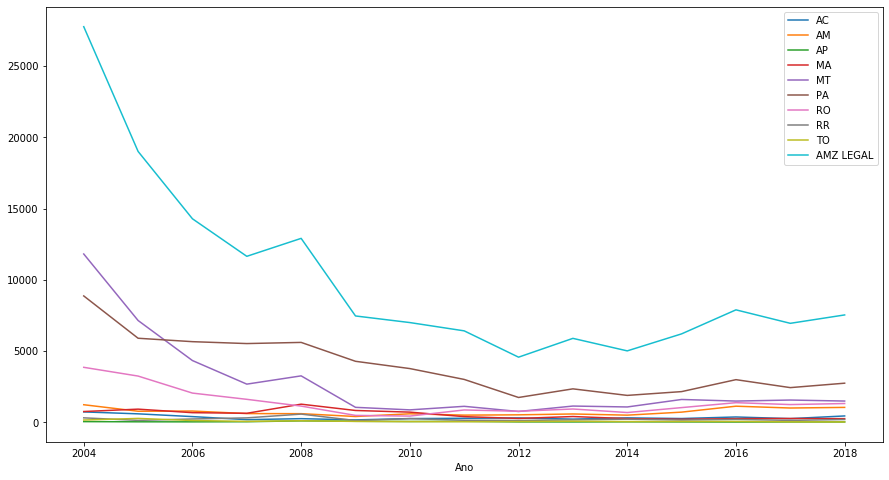

In [3]:
df_prodes.plot(figsize=(15, 8))

 ### 2004 - [Plano de Ação para Prevenção e Controle do Desmatamento na Amazônia Legal (PPCDAm)](http://redd.mma.gov.br/pt/acompanhamento-e-a-analise-de-impacto-das-politicas-publicas/ppcdam)
 
![title](dados/PPCDAm.jpg)

In [60]:
df_calor = pd.read_csv("./dados/focos_calor_estados_1998_2017.csv", sep="\t")
df_calor.head()

,Ano,Estado,Mês,Número,Período
0,1998,Acre,Janeiro,0.0,01/01/1998
1,1999,Acre,Janeiro,0.0,01/01/1999
2,2000,Acre,Janeiro,0.0,01/01/2000
3,2001,Acre,Janeiro,0.0,01/01/2001
4,2002,Acre,Janeiro,0.0,01/01/2002


In [61]:
df_calor.tail()

,Ano,Estado,Mês,Número,Período
6449,2012,Tocantins,Dezembro,128.0,01/01/2012
6450,2013,Tocantins,Dezembro,85.0,01/01/2013
6451,2014,Tocantins,Dezembro,223.0,01/01/2014
6452,2015,Tocantins,Dezembro,373.0,01/01/2015
6453,2016,Tocantins,Dezembro,119.0,01/01/2016


In [62]:
df_calor = df_calor.drop(columns="Período")
df_calor.head()

,Ano,Estado,Mês,Número
0,1998,Acre,Janeiro,0.0
1,1999,Acre,Janeiro,0.0
2,2000,Acre,Janeiro,0.0
3,2001,Acre,Janeiro,0.0
4,2002,Acre,Janeiro,0.0


In [63]:
df_calor["Mês"] = df_calor["Mês"].replace({
    mes: idx+1 for idx, mes in enumerate([
        "Janeiro",
        "Fevereiro",
        "Março",
        "Abril",
        "Maio",
        "Junho",
        "Julho",
        "Agosto",
        "Setembro",
        "Outubro",
        "Novembro",
        "Dezembro"
    ])
})

In [64]:
siglas = pd.read_csv("./dados/siglas_estados.csv", sep=";").set_index("Estado").to_dict()["Sigla"]
siglas

{'Acre': 'AC',
 'Alagoas': 'AL',
 'Amapá': 'AP',
 'Amazonas': 'AM',
 'Bahia': 'BA',
 'Ceará': 'CE',
 'Distrito Federal': 'DF',
 'Espírito Santo': 'ES',
 'Goiás': 'GO',
 'Maranhão': 'MA',
 'Mato Grosso': 'MT',
 'Mato Grosso do Sul': 'MS',
 'Minas Gerais': 'MG',
 'Pará': 'PA',
 'Paraíba': 'PB',
 'Paraná': 'PR',
 'Pernambuco': 'PE',
 'Piauí': 'PI',
 'Rio de Janeiro': 'RJ',
 'Rio Grande do Norte': 'RN',
 'Rio Grande do Sul': 'RS',
 'Rondônia': 'RO',
 'Roraima': 'RR',
 'Santa Catarina': 'SC',
 'São Paulo': 'SP',
 'Sergipe': 'SE',
 'Tocantins': 'TO'}

In [65]:
df_calor["Estado"] = df_calor["Estado"].replace(siglas)
df_calor.head()

,Ano,Estado,Mês,Número
0,1998,AC,1,0.0
1,1999,AC,1,0.0
2,2000,AC,1,0.0
3,2001,AC,1,0.0
4,2002,AC,1,0.0


In [81]:
df_calor.pivot_table(values="Número", index="Estado", columns="Ano", aggfunc="sum")

Ano,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Estado,,,,,,,,,,,,,,,,,,,,
AC,730.000,333.000,434.000,828.000,1543.949,946.918,1183.978,984.451,1221.370,1213.080,1143.666,831.265,475.213,709.204,1185.996,1108.136,557.275,1191.325,1224.774,618.430
AL,86.000,172.000,123.000,86.000,258.000,299.000,159.000,217.000,161.000,128.000,277.000,325.000,222.000,232.000,352.000,208.000,190.000,590.000,400.000,159.000
AM,946.000,1061.000,853.000,1297.000,2852.000,1524.268,2298.207,1657.128,997.640,589.601,2717.000,1320.601,2324.508,1652.538,1110.641,905.217,2385.909,1189.994,2060.972,906.905
AP,278.000,101.000,253.000,1301.000,862.096,1652.000,2261.000,1271.000,817.000,440.000,785.000,1109.019,721.000,1100.000,2103.000,975.000,1490.000,1354.300,1493.161,1465.000
BA,1224.687,1197.582,1378.635,2427.651,2280.700,3076.150,1644.409,2358.066,2509.085,2210.279,1912.703,2185.162,2515.010,2025.047,3454.937,2571.650,2457.367,2355.058,3520.234,1441.814
CE,1612.014,1688.000,2211.000,1847.501,454.108,795.524,383.275,680.221,1109.173,1711.620,1212.408,930.640,2087.652,774.002,2937.104,1818.081,2512.000,1320.102,1788.638,2555.000
DF,103.000,46.000,48.000,64.000,149.000,96.000,279.000,92.000,76.000,274.000,115.000,92.000,505.000,273.000,173.000,101.000,251.000,172.000,242.000,410.000
ES,218.000,240.000,175.000,130.000,297.000,708.000,174.000,121.000,215.000,382.000,251.000,216.000,225.000,326.000,352.000,250.000,347.000,1031.000,654.000,234.000
GO,750.119,1910.096,2516.293,2065.863,1619.315,2078.845,1798.738,1709.058,1294.463,888.322,1059.486,2682.000,1897.216,1808.872,2181.976,2979.000,1569.889,2762.103,2542.735,1581.131


In [28]:
sum(range(1, 12))

66